# Apprendre a utiliser et visualiser un Dataset Synthetic

a la fin de ce workshop vous saurez:

- adopter un workflow de base avec Github (develop, verify ,Commit)
- generer une dataset synthetic de classification 2D ac la libraire sklearn
- visualser les classes du dataset sur un graphique 2D
- visualiser les predictions de votre reseau de neurinnes sur un graphique 2D
- bonus

In [1]:
# importer les librairies utiles

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_classification

In [5]:
# Créer un dataset séparable par une ligne droite en 2D

def split_dataset(X, y, train_pct=0.66):
    """ Va séparer les datasets avec respect pour le pourcentage du dataset à mettre dans le train set.
    Warning: La dimension des exemples doit être la première.
    
    :X mes exemples, shape=(m, -1), m -> dimensions des exemples
    :y mes labels, shape=(m, -1), m -> dimensions des exemples
    :train_pct (default=0.66) Optionnal, c'est un pourcentage qui va séparer le de dataset avec train_pct * total_size dans le train set.
    
    return X_train, y_train, X_test, y_test 
    

    >>> X_train, y_train, X_test, y_test = split_dataset(X, y)
    """
    # 1ere dimension -> celle des exemples
    total_size = X.shape[0]
    
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    # On récupère `train_pct` % du dataset pour le train set, aussi il faut convertir en entier pour numpy ...
    train_size = int(train_pct * total_size)
    # ... et on met le reste danss le test set
    test_size  = total_size - train_size 
    
    # On met les `train_size` premier exemples/labels dans le train set ...
    X_train, y_train = (X[:train_size], y[:train_size])
    # ... et les test_size derniers exemples/labels dans le test set.
    X_test , y_test  = (X[-test_size:], y[-test_size:])

    # On s'assure que tous les exemples soient présents dans le test set ou le train set.
    assert X_test.shape[0] + X_train.shape[0] == total_size
    assert y_test.shape[0] + y_train.shape[0] == total_size
    
    return X_train, y_train, X_test, y_test 



X, y = make_classification(n_samples=200,
                          n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)

for each in (X, y):
    print(each.shape)

print()

X_train, y_train, X_test, y_test = split_dataset(X, y)

for each in (X_train, y_train, X_test, y_test):
    print(each.shape)
        

(200, 2)
(200,)

(132, 2)
(132, 1)
(68, 2)
(68, 1)


In [7]:
# refactoriser plot_dataset

def plot_dataset(x,y):
    """
    permet d'afficher les classes 'y' d'examples a deux features(2D), 'X'
    :x, matrices d'examples, deux features par example shape = (m,2)
    :y, matices de labels, shape =(m,1)
    return : None
    
    """
    
    plt.scatter(x[:,0], x[:,1], 
            c = y[:, 0],
           cmap = plt.cm.jet)
    
    return None
    


# creer un dataset lineairement separable

#creation d'un dataset de classification en 2D avec la fonction `make_classification` du mode `sklearn`


In [31]:
# On fixe le nombre d'example total par dataset à SAMPLE_SIZE
SAMPLE_SIZE = 200

#fixer le hasard
np.random.seed(11)

# On créé le dataset séparable lineairement
X, y = make_classification(n_samples=SAMPLE_SIZE,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1)

# On split le dataset en set de training et de test.
X_train, y_train, X_test, y_test = split_dataset(X, y)

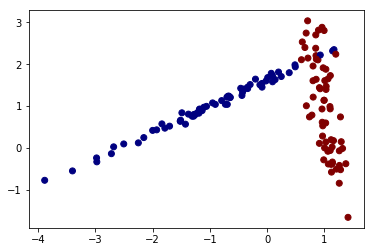

In [32]:
# On af
plot_dataset(X_train, y_train)

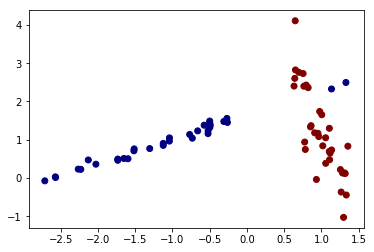

In [33]:
plot_dataset(X_test, y_test)